## Laboratorium 2 - Algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/dataset.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab02.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
import numpy as np

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [2]:
import numpy as np

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [3]:
print("Wszystkie w train: "+ str(len(train)))
print("Wszystkie w test: "+ str(len(train)))
print(int(test[0,0]))
train[:,0] == 36 #pobranie pierwszej kolumny
klasa = [0] *40
for i in range(1,41):
    print('Klasa' + str(i) + ' ' + str(len(train[train[:,0] ==i])))

for i in range(2244):
        klasa[int(train[i,0])] +=1
#Nie ma niektórych próbek
print(klasa)


Wszystkie w train: 2244
Wszystkie w test: 2244
31
Klasa1 77
Klasa2 66
Klasa3 55
Klasa4 66
Klasa5 77
Klasa6 44
Klasa7 44
Klasa8 33
Klasa9 121
Klasa10 88
Klasa11 88
Klasa12 77
Klasa13 99
Klasa14 66
Klasa15 66
Klasa16 0
Klasa17 0
Klasa18 0
Klasa19 0
Klasa20 0
Klasa21 0
Klasa22 121
Klasa23 77
Klasa24 77
Klasa25 66
Klasa26 99
Klasa27 55
Klasa28 66
Klasa29 110
Klasa30 77
Klasa31 77
Klasa32 66
Klasa33 66
Klasa34 99
Klasa35 88
Klasa36 33
Klasa37 0
Klasa38 0
Klasa39 0
Klasa40 0
[0, 77, 66, 55, 66, 77, 44, 44, 33, 121, 88, 88, 77, 99, 66, 66, 0, 0, 0, 0, 0, 0, 121, 77, 77, 66, 99, 55, 66, 110, 77, 77, 66, 66, 99, 88, 33, 0, 0, 0]


### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [4]:
# <UZUPEŁNIJ>
#x= train[:,0] ==3 
#y = train[:,0] ==5
#x|y
# LUB 
train[(train[:,0]==3) | (train[:,0] ==5)]
#LUB
train[np.isin(train[:,0], [3,5])]
#WAŻNE 
train_new = train[np.isin(train[:,0], [3,5])]
test_new =  test[np.isin(test[:,0], [3,5])]

### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje kolekcję funkcji przydatnych do wizualizacji z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples):
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
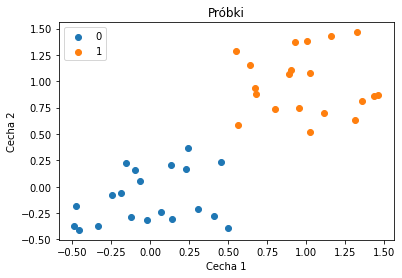

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

Klasa5 55


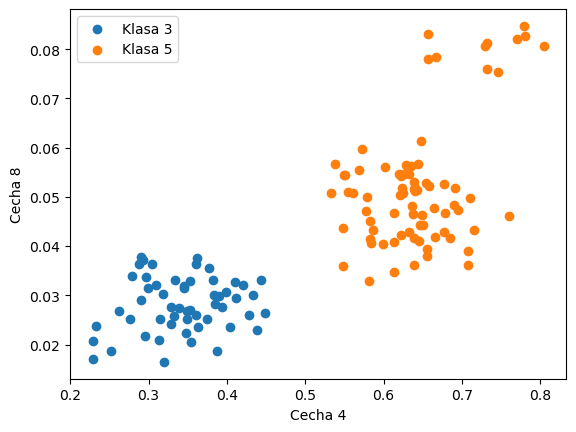

In [5]:
import matplotlib.pyplot as plt
cecha4 = train_new[:,4]
cecha8 = train_new[:,8]
for i in [3,5]:
    X= train_new[train_new[:,0]==i] [:,4]
    Y= train_new[train_new[:,0]==i] [:,8]
    plt.scatter(X,Y, label='Klasa '+ str(i))

plt.legend()
plt.xlabel("Cecha 4")
plt.ylabel("Cecha 8")

print('Klasa' + str(i) + ' ' + str(len(test_new[test_new[:,0] ==i])))


### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktem `p1` oraz `p2` uwzględniający wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$

In [6]:

featuresy = [1, 2] # kolumny o indeksach 1, 2
p1 = [0, 2, 3]
p2 = [0, 5, 6]

def edist(p1, p2, features):
    edvalue=0
    for cecha in features:
        edvalue +=(p1[cecha]- p2[cecha])**2
    return edvalue**(0.5)

edist(p1, p2, featuresy) # 4.242640687119285

4.242640687119285

### Zadanie 6

Zaimplementuj klasyfikator najbliższego sąsiada. 
1. Oblicz odległość każdego elementu ze zbioru _testowego_ do każdego elementu ze zbioru _treningowego_. 
2. Odnajdź taki element ze zbioru _treningowego_, którego odległość do klasyfikowanego elementu (ze zbioru _testowego_) jest najmniejsza.
3. Przypisz klasyfikowanemu elementowi klasę.


1. Class (Species)
2. Specimen Number
3. Eccentricity
4. Aspect Ratio        <----
5. Elongation          <----
6. Solidity                 <----
7. Stochastic Convexity      <-----
8. Isoperimetric Factor
9. Maximal Indentation Depth     <-----
10. Lobedness              <-----
11. Average Intensity      <----
12. Average Contrast         <-----
13. Smoothness       <----
14. Third moment           <----
15. Uniformity           <----
16. Entropy         <----

In [7]:

klasy = [3,5]
features = [4,8]
edists = np.zeros((int(len(train_new)),int(len(test_new))))
for trainers in range(len(train_new)):
    for testers in range(len(test_new)):
        edists[trainers, testers] = edist(train_new[trainers,:],test_new[testers,:],features)

mins = []
klasa_testerow = []
for testers in range(len(test_new)):
    mymin = min(edists[:,testers])
    mins.append([i for i, x in enumerate(edists[:,testers]) if x == mymin])
    mins[testers] = mins[testers][0] #fixing broken values

#print(mins)

for testers in range(len(test_new)):
    klasa_testerow.append(train[mins[testers],0])
    klasa_testerow[testers] = int(klasa_testerow[testers]) 
#print(klasa_testerow)
#print(test_new[:,0])




### Zadanie 7
Wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każdą klasę w innym kolorze, a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

Text(0, 0.5, 'Cecha 8')

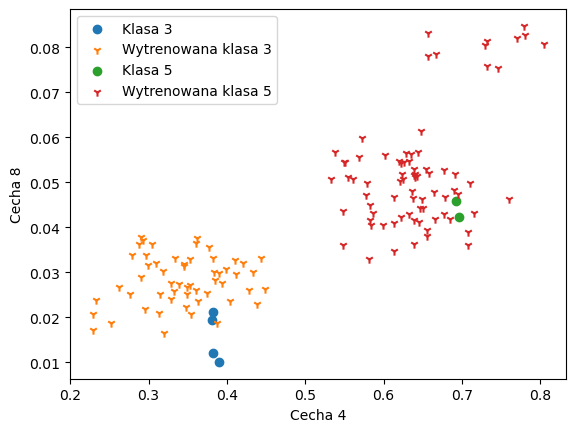

In [8]:
# <UZUPEŁNIJ>
test_experimental = test_new[:,:]

for testers in range(len(test_new)):
    test_experimental[testers,0] = klasa_testerow[testers]
    
for i in klasy:
    X= test_experimental[test_experimental[:,0]== i] [:,4]
    Y= test_experimental[test_experimental[:,0]==i] [:,8]
    plt.scatter(X,Y, label='Klasa '+ str(i))
    X2= train_new[train_new[:,0]==i] [:,4]
    Y2= train_new[train_new[:,0]==i] [:,8]
    plt.scatter(X2,Y2, label='Wytrenowana klasa '+ str(i), marker='1')

plt.legend()
plt.xlabel("Cecha 4")
plt.ylabel("Cecha 8")

Text(0, 0.5, 'Cecha 8')

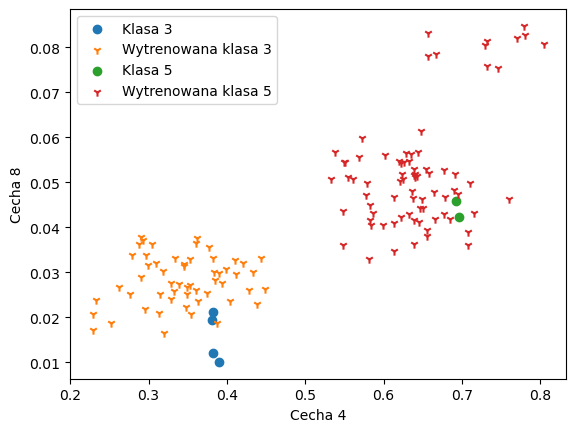

In [81]:
# <UZUPEŁNIJ>

import matplotlib.pyplot as plt
for i in klasy:
    X= test_new[test_new[:,0]==i] [:,4]
    Y= test_new[test_new[:,0]==i] [:,8]
    plt.scatter(X,Y, label='Klasa '+ str(i))
    X2= train_new[train_new[:,0]==i] [:,4]
    Y2= train_new[train_new[:,0]==i] [:,8]
    plt.scatter(X2,Y2, label='Wytrenowana klasa '+ str(i), marker='1')

plt.legend()
plt.xlabel("Cecha 4")
plt.ylabel("Cecha 8")

### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [82]:
T =0
for i in range(len(test_new)):
    if test_new[i,0] == klasa_testerow[i]:
        T=T+1
        
Accuracy = T / len(test_new) * 100

print(Accuracy)


100.0


### Zadanie 9

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.

> Możesz połączyć wszystkie powyższe fragmenty doku w wkleić w komórkę poniżej zmieniając liczbę klas.

100.0


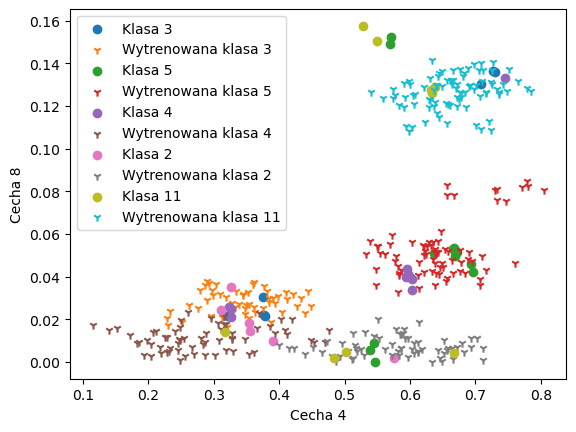

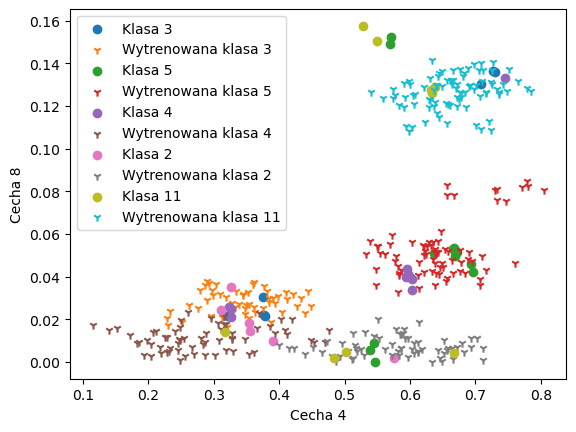

In [10]:
import numpy as np
import matplotlib.pyplot as plt

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

klasy = [3,5,4,2,11]
features = [4,8]

train_new = train[np.isin(train[:,0], klasy)]
test_new =  test[np.isin(test[:,0], klasy)]



def edist(p1, p2, features):
    edvalue=0
    for cecha in features:
        edvalue +=(p1[cecha]- p2[cecha])**2
    return edvalue**(0.5)


edists = np.zeros((int(len(train_new)),int(len(test_new))))
for trainers in range(len(train_new)):
    for testers in range(len(test_new)):
        edists[trainers, testers] = edist(train_new[trainers,:],test_new[testers,:],features)

mins = []
klasa_testerow = []
for testers in range(len(test_new)):
    mymin = min(edists[:,testers])
    mins.append([i for i, x in enumerate(edists[:,testers]) if x == mymin])
    mins[testers] = mins[testers][0] #fixing broken values

#print(mins)
for testers in range(len(test_new)):
    klasa_testerow.append(train[mins[testers],0])
    klasa_testerow[testers] = int(klasa_testerow[testers]) 
#print(klasa_testerow)
#print(test_new[:,0])

test_experimental = test_new[:,:]
for testers in range(len(test_new)):
    test_experimental[testers,0] = klasa_testerow[testers]

plt.figure(0)
for i in klasy:
    X= test_experimental[test_experimental[:,0]== i] [:,4]
    Y= test_experimental[test_experimental[:,0]==i] [:,8]
    plt.scatter(X,Y, label='Klasa '+ str(i))
    X2= train_new[train_new[:,0]==i] [:,4]
    Y2= train_new[train_new[:,0]==i] [:,8]
    plt.scatter(X2,Y2, label='Wytrenowana klasa '+ str(i), marker='1')

plt.legend()
plt.xlabel("Cecha 4")
plt.ylabel("Cecha 8")
              


plt.figure(1)

for i in klasy:
    X= test_new[test_new[:,0]==i] [:,4]
    Y= test_new[test_new[:,0]==i] [:,8]
    plt.scatter(X,Y, label='Klasa '+ str(i))
    X2= train_new[train_new[:,0]==i] [:,4]
    Y2= train_new[train_new[:,0]==i] [:,8]
    plt.scatter(X2,Y2, label='Wytrenowana klasa '+ str(i), marker='1')

plt.legend()
plt.xlabel("Cecha 4")
plt.ylabel("Cecha 8")

T =0
for i in range(len(test_new)):
    if test_new[i,0] == klasa_testerow[i]:
        T=T+1
        
Accuracy = T / len(test_new) * 100

print(Accuracy)



### Zadanie 10

Przeprowadź eksperyment ponownie dla większej liczby cech.

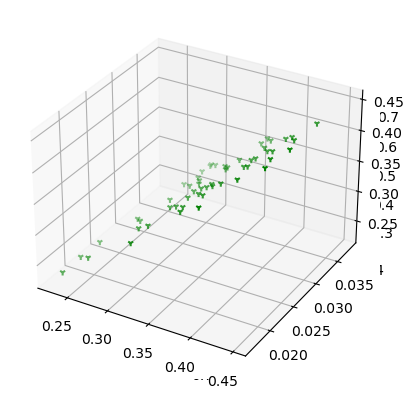

100.0


In [27]:
import numpy as np
import matplotlib.pyplot as plt

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

klasy = [3,5,4,2,11]
features = [4,8, 5]

train_new = train[np.isin(train[:,0], klasy)]
test_new =  test[np.isin(test[:,0], klasy)]



def edist(p1, p2, features):
    edvalue=0
    for cecha in features:
        edvalue +=(p1[cecha]- p2[cecha])**2
    return edvalue**(0.5)


edists = np.zeros((int(len(train_new)),int(len(test_new))))
for trainers in range(len(train_new)):
    for testers in range(len(test_new)):
        edists[trainers, testers] = edist(train_new[trainers,:],test_new[testers,:],features)

mins = []
klasa_testerow = []
for testers in range(len(test_new)):
    mymin = min(edists[:,testers])
    mins.append([i for i, x in enumerate(edists[:,testers]) if x == mymin])
    mins[testers] = mins[testers][0] #fixing broken values

#print(mins)
for testers in range(len(test_new)):
    klasa_testerow.append(train[mins[testers],0])
    klasa_testerow[testers] = int(klasa_testerow[testers]) 
#print(klasa_testerow)
#print(test_new[:,0])

test_experimental = test_new[:,:]
for testers in range(len(test_new)):
    test_experimental[testers,0] = klasa_testerow[testers]

from mpl_toolkits import mplot3d
ax1 = plt.axes(projection ="3d")
ax2 = plt.axes(projection ="3d")
    
for i in klasy:
    X= test_experimental[test_experimental[:,0]== i] [:,4]
    Y= test_experimental[test_experimental[:,0]==i] [:,8]
    Z= test_experimental[test_experimental[:,0]==i] [:,5]
    ax1.scatter3D(X, Y, X, label='Klasa '+ str(i), color='blue')
    X2= train_new[train_new[:,0]==i] [:,4]
    Y2= train_new[train_new[:,0]==i] [:,8]
    Z2= train_new[train_new[:,0]==i] [:,5]
    ax2.scatter3D(X2, Y2, X2, label='Wytrenowana Klasa '+ str(i), marker='1', color= 'green')
    plt.show()


              



T =0
for i in range(len(test_new)):
    if test_new[i,0] == klasa_testerow[i]:
        T=T+1
        
Accuracy = T / len(test_new) * 100

print(Accuracy)



### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.


Taka metoda wyznaczania przynależności do klas ma szereg wad:

Nie uwzględnia ona dużych błędów

Nie posiada informacji o skali (Cecha 8 ma na ogół wartości rząd mniejsze od chechy 4, a są traktowane równoważnie)

Nie ma sensu w przypadku bardzo zbliżonych cech

W przypadku 1. eksperymentu bardzo dobrze widać na wykresie, że metoda zadziałała, lecz niestety w przypadku 2. i 3. czytelność wykresów jest utrudniona 

# Notatki
### Bez klas